In [191]:
!python -m spacy download en_core_web_lg

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


Sweet, that was easy! Let's load up the package and the embedding library.


In [2]:
import spacy
embedder = spacy.load('en_core_web_lg')

In [3]:
board_input  = 'STEEL CHURCHILL OPERA BULB NOTRE PASTE HEAD FIELD COVER SATURN COLOSSEUM PEARL CLEOPATRA NYLON MARIE GEAR UNICORN HELMET GATES SPRAY SPINE SILK ROAD COUNTRY STRING'
words = embedder(board_input)

In [4]:
conda install seaborn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda




In [4]:
import seaborn as sns
import numpy as np

def WordDistance(clue_word, board_words, guess_num:int):
    
    ## clue_word (token) - The word given to the Operative as a clue
    ## board_wors (list of token) - Words remaining on the board
    ## guess_num (int) - Number of board_words linked to this clue_word    
    
    # Create dictionary to hold distance of board words to clue word
    word_dict = {str(board_word): '' for board_word in words}
    
    # Calculate distances and add to dictionary
    for board_word in board_words:
    
        word_dict[str(board_word)]= (np.linalg.norm(board_word.vector - clue_word.vector))
    
    # Order dictionary
    dists = [v for k, v in sorted(word_dict.items(), key=lambda item: item[1])]
    dist_dict = {v: k for k, v in sorted(word_dict.items(), key=lambda item: item[1])}
    
    # Colour heatmap
    board_array = np.empty(shape=(5,5))
    labels_array = np.array([['                             ']*5]*5)
    
    for i, word in enumerate(board_words):
        
        board_array[int(np.floor(i/5))][i%5] = word_dict[str(word)]
        labels_array[int(np.floor(i/5))][i%5] = str(word)
        
    sns.heatmap(board_array, annot=labels_array, fmt='')  
    
    return board_array, labels_array

In [ ]:
class Operative:
    
    nlp = spacy.load('en_core_web_lg')
    english_words = set([word.upper() for word in nltk.corpus.words.words()])
    vocab = set([word.upper() for word in nlp.vocab.strings]).intersection(english_words)
    
    @classmethod
    def set_vocab(cls, possible_words: set) -> None:
        cls.vocab = list(set([word.upper() for word in cls.nlp.vocab.strings if word in possible_words]))
    
    def __init__(self, board_words: list) -> None: 
        
        ##     Arguments
        ##     ------------
        ##     board_words : list of the form [] with remaining board words
        ##     my_team : string, which team the bot is on (should be a key in board_dict)
            
        # initialise spacy NLP instances
        board_word_nlp = SpyMaster.nlp.pipe(self.board_words)
#         proposal_word_nlp = SpyMaster.nlp.pipe(self.proposal_words)
        
        # get embeddings for words on the board
        self.board_embeddings = np.array([word.vector for word in board_word_nlp])
        
        # calculate L2 norms for board word embeddings
        board_embedding_norms = np.linalg.norm(self.board_embeddings, axis=1, ord=2)
        
        # norm everything to 1
        self.board_embeddings = self.board_embeddings / board_embedding_norms[:, None]
        
        # get proposal word embeddings, calculate norms
        self.proposal_embeddings = np.array([word.vector for word in proposal_word_nlp])
        proposal_embedding_norms = np.linalg.norm(self.proposal_embeddings, axis=1, ord=2)
        
        # remove words with zero-norm embeddings
        nonzero_norm_mask = proposal_embedding_norms != 0
        self.proposal_embeddings = self.proposal_embeddings[nonzero_norm_mask]
        self.proposal_embeddings = self.proposal_embeddings / proposal_embedding_norms[nonzero_norm_mask, None]
        self.proposal_words = np.array(self.proposal_words)[nonzero_norm_mask].tolist()
        
        # get cosine similarity between words on the board and all possible proposals
        self.proposal_board_similarities = self.proposal_embeddings @ self.board_embeddings.T
        
        self.alpha = alpha
        
        self.my_team_score = 0
        self.other_team_score = 0
        
    def WordDistance(clue_word, board_words, guess_num:int):
    
        ## clue_word (token) - The word given to the Operative as a clue
        ## board_wors (list of token) - Words remaining on the board
        ## guess_num (int) - Number of board_words linked to this clue_word    

        # Create dictionary to hold distance of board words to clue word
        word_dict = {str(board_word): '' for board_word in words}

        # Calculate distances and add to dictionary
        for board_word in board_words:

            word_dict[str(board_word)]= (np.linalg.norm(board_word.vector - clue_word.vector))

        # Order dictionary
        dists = [v for k, v in sorted(word_dict.items(), key=lambda item: item[1])]
        dist_dict = {v: k for k, v in sorted(word_dict.items(), key=lambda item: item[1])}

        # Colour heatmap
        board_array = np.empty(shape=(5,5))
        labels_array = np.array([['                             ']*5]*5)

        for i, word in enumerate(board_words):

            board_array[int(np.floor(i/5))][i%5] = word_dict[str(word)]
            labels_array[int(np.floor(i/5))][i%5] = str(word)

        sns.heatmap(board_array, annot=labels_array, fmt='')  
    
        return board_array, labels_array

(array([[ 3.35619521, 10.51294994, 10.50433636,  9.39598846, 10.85509586],
        [ 9.72499657,  8.87108421,  9.75033855,  8.82058334, 10.04864216],
        [10.77023125,  8.5295372 , 10.18693542,  8.20460606, 10.0379467 ],
        [ 8.76033878,  9.78658295,  9.24552917,  9.09208488,  8.8367548 ],
        [10.11312294,  9.33206844,  9.46088028,  9.58809376,  9.59723663]]),
 array([['STEEL', 'CHURCHILL', 'OPERA', 'BULB', 'NOTRE'],
        ['PASTE', 'HEAD', 'FIELD', 'COVER', 'SATURN'],
        ['COLOSSEUM', 'PEARL', 'CLEOPATRA', 'NYLON', 'MARIE'],
        ['GEAR', 'UNICORN', 'HELMET', 'GATES', 'SPRAY'],
        ['SPINE', 'SILK', 'ROAD', 'COUNTRY', 'STRING']], dtype='<U29'))

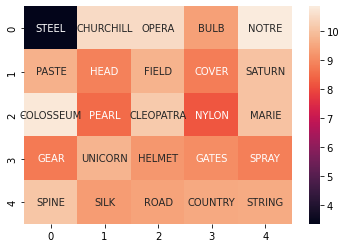

In [6]:
WordDistance(embedder('STAINLESS'), words, 3)